In [1]:
import numpy as np

def onedim_8sites_IsingModel_OBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      

def onedim_8sites_IsingModel_PBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      
    qc.cx(0,n_qubits-1)
    qc.rx(-2*J*dt,0)
    qc.cx(0,n_qubits-1)
    qc.barrier()      


In [2]:
import sys
print("Python en uso:", sys.executable)


Python en uso: c:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Qiskit\Scripts\python.exe


In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister


# ===============================
# Create an arbitrary circuit
# ===============================
J=0.02
ht=1
dt=10
time_steps=16
n_qubits=8
qr=QuantumRegister(n_qubits)
qc=QuantumCircuit(qr)

qc.draw() #check that we are not "rewritting" on an used circuit


q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
q0_4: 
      
q0_5: 
      
q0_6: 
      
q0_7:

In [4]:
#Initialize the state vector
qc.x(3)
qc.x(7)

for t in range(time_steps):
    onedim_8sites_IsingModel_PBC(qc,n_qubits,dt)

qc.measure_all()

In [ ]:
# ===================================
# Run on a real quantum computer (here I store my account data locally)
# ===================================
from qiskit_ibm_runtime import QiskitRuntimeService

# Guarda los datos localmente para no tener que reintroducirlos siempre
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="---------------------",
    instance="------------------",
    overwrite=True
)

In [ ]:
service = QiskitRuntimeService()

# See which devices (simulators/QPUs) you have access to
backends = service.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile
# Get a real backend
backend_real = service.backend("ibm_torino")  
qc_transpiled = transpile(qc, backend=backend_real)

sampler_real = Sampler(backend_real)
job_real = sampler_real.run([qc_transpiled], shots=10000)
counts_real = job_real.result()[0].data.meas.get_counts()


In [9]:
# Inspect result of SamplerV2 primitive performed on real IBM quantum hardware
print("\nResult for the ibm_torino hardware:")
print(counts_real)

result_real = job_real.result()
spans = result_real.metadata["execution"]["execution_spans"]
shots = spans[0].size
print("Total shots executed:", shots)




Result for the ibm_torino hardware:
{'00000010': 240, '11101001': 13, '10000000': 277, '00100000': 216, '10101100': 20, '10010000': 71, '10001000': 91, '00000100': 165, '00100010': 325, '11000000': 127, '01000010': 155, '10100010': 58, '00011010': 58, '00000000': 391, '00001100': 69, '01010010': 50, '00101111': 12, '01111000': 28, '00110001': 38, '10000101': 49, '01100111': 11, '00010001': 82, '10101001': 15, '00100110': 33, '01010001': 34, '00001000': 264, '10000111': 19, '01010110': 27, '00001111': 26, '00011111': 10, '01001000': 90, '00100001': 144, '00101010': 35, '10110100': 16, '01100000': 116, '10010100': 42, '10000001': 68, '00011011': 30, '10100110': 22, '01111111': 12, '10100111': 15, '00010111': 17, '00100111': 27, '11000010': 59, '00000001': 178, '01000100': 97, '00100101': 27, '01001110': 21, '00110010': 50, '00000111': 34, '01000000': 257, '10100000': 137, '00110100': 45, '01011010': 14, '01110010': 25, '01100010': 60, '00010000': 197, '01011011': 9, '00001010': 91, '010

In [ ]:
# ===================================
# 3. Calculate the probability that each qubit is in state |1>
#
# ===================================
total_shots = sum(counts_real.values())
prob_qubits = [0] * n_qubits

for bitstring, freq in counts_real.items():
    # bitstring is in little-endian order (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits[i] += freq

# Normalize
prob_qubits = [p / total_shots for p in prob_qubits]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits):
    print(f"Qubit {i}: {p:.4f}")



Probabilidad de cada qubit de estar en |1>:
Qubit 0: 0.2984
Qubit 1: 0.3595
Qubit 2: 0.2965
Qubit 3: 0.3084
Qubit 4: 0.3107
Qubit 5: 0.3521
Qubit 6: 0.3241
Qubit 7: 0.3315


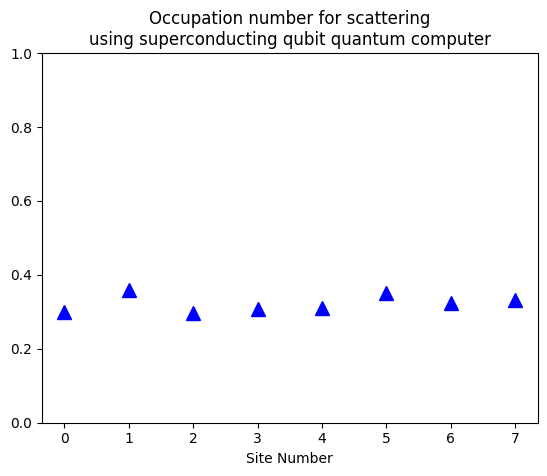

In [ ]:
# ===================================
# 4. Visualización opcional
# ===================================
import matplotlib.pyplot as plt
#plt.bar(range(n_qubits), probs) this is for plotting bars (in the paper are used for representing the exact diagonalization case)

plt.plot(range(len(prob_qubits)), prob_qubits,
         '^',         
         color='blue', 
         markersize=10 
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for scattering\nusing superconducting qubit quantum computer", fontsize=12)

plt.show()

Resultados guardados en Fig10b)_(E2)_ibm_torino.json


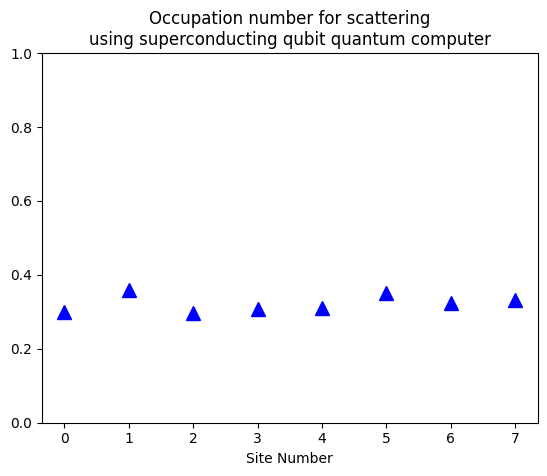

Histograma guardado en Fig10b)_(E2)_ibm_torino.png


In [ ]:
# ==============================
# Save results in JSON
# ==============================

import os
import json

save_path = r"C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Fig10_ibm_torino\Fig10b)_ibm_torino"
os.makedirs(save_path, exist_ok=True)

results_dict = {
    "counts": counts_real,
    "shots": shots,
    "prob_qubits": prob_qubits
}

label = "E2"
filename_json = f"Fig10b)_({label})_ibm_torino.json"
filename_png  = f"Fig10b)_({label})_ibm_torino.png"

with open(os.path.join(save_path, filename_json), "w") as f:
    json.dump(results_dict, f, indent=4)

print(f"Saved results en {filename_json}")

# ==============================
# 6. Guardar el histograma
# ==============================
plt.plot(range(len(prob_qubits)), prob_qubits,
         '^', color='blue', markersize=10)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for scattering\nusing superconducting qubit quantum computer", fontsize=12)


plt.savefig(os.path.join(save_path, filename_png), dpi=300)
plt.show()

print(f"Saved histogram at {filename_png}")